# Telecom Churn Case Study - ML Module II

## Step 1: `Understanding the data

### Importing libraries

In [295]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os
import warnings
warnings.filterwarnings('ignore')

In [296]:
data = pd.read_csv(r'C:\Users\amanr\Downloads\telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [297]:
# Check the head of the dataset
data.shape

(99999, 226)

In [298]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [299]:
# 6 and 7 can be combined
# can certain columns be combined too - like having just incoming cal usage and outgoing calll usage for 6-9 months
# for month 9 i will put 1 or 0 and emove 9 related columns - can i do the same for other months
# before all this i also need to do some data cleaning before we begin with combinig datas together

## Step 2: Data Preparation 

#### Check for missing values and imputing them

In [300]:
#Identify null values
# adding up the missing values (column-wise)
nulls = data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

mobile_number 0
circle_id 0
loc_og_t2o_mou 1018
std_og_t2o_mou 1018
loc_ic_t2o_mou 1018
last_date_of_month_6 0
last_date_of_month_7 601
last_date_of_month_8 1100
last_date_of_month_9 1659
arpu_6 0
arpu_7 0
arpu_8 0
arpu_9 0
onnet_mou_6 3937
onnet_mou_7 3859
onnet_mou_8 5378
onnet_mou_9 7745
offnet_mou_6 3937
offnet_mou_7 3859
offnet_mou_8 5378
offnet_mou_9 7745
roam_ic_mou_6 3937
roam_ic_mou_7 3859
roam_ic_mou_8 5378
roam_ic_mou_9 7745
roam_og_mou_6 3937
roam_og_mou_7 3859
roam_og_mou_8 5378
roam_og_mou_9 7745
loc_og_t2t_mou_6 3937
loc_og_t2t_mou_7 3859
loc_og_t2t_mou_8 5378
loc_og_t2t_mou_9 7745
loc_og_t2m_mou_6 3937
loc_og_t2m_mou_7 3859
loc_og_t2m_mou_8 5378
loc_og_t2m_mou_9 7745
loc_og_t2f_mou_6 3937
loc_og_t2f_mou_7 3859
loc_og_t2f_mou_8 5378
loc_og_t2f_mou_9 7745
loc_og_t2c_mou_6 3937
loc_og_t2c_mou_7 3859
loc_og_t2c_mou_8 5378
loc_og_t2c_mou_9 7745
loc_og_mou_6 3937
loc_og_mou_7 3859
loc_og_mou_8 5378
loc_og_mou_9 7745
std_og_t2t_mou_6 3937
std_og_t2t_mou_7 3859
std_og_t2t_mou_8

In [301]:
#same would be the case for other two

#loc_og_t2o_mou - local - outgoiing - fixed line - minutes
#std_og_t2o_mou - std - outgoiing - fixed line - minutes
#loc_ic_t2o_mou - local - incoming - fixed line - minutes

In [302]:
print(data['last_date_of_month_7'].value_counts())
print(data['last_date_of_month_8'].value_counts())
print(data['last_date_of_month_9'].value_counts())

7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
9/30/2014    98340
Name: last_date_of_month_9, dtype: int64


In [303]:
#replacig null values with 0 for all minute columns - pt1
data[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_t2c_mou_9','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2f_mou_9','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_og_mou_9','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9','og_others_6','og_others_7','og_others_8','og_others_9','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2t_mou_9','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_ic_mou_9','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9' ]]=data[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_t2c_mou_9','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2f_mou_9','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_og_mou_9','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9','og_others_6','og_others_7','og_others_8','og_others_9','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2t_mou_9','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_ic_mou_9','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9' ]].fillna(0)

In [304]:
#replacig null values with 0 for all minute columns - pt2
data[['ic_others_9','ic_others_8','ic_others_7','ic_others_6']]=data[['ic_others_9','ic_others_8','ic_others_7','ic_others_6']].fillna(0)

<AxesSubplot:xlabel='total_rech_data_9'>

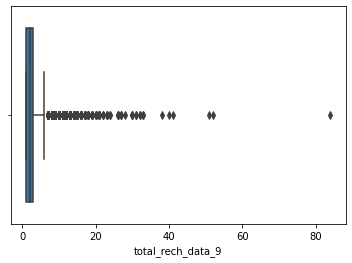

In [305]:
sns.boxplot(data['total_rech_data_9'])

<AxesSubplot:xlabel='total_rech_data_9', ylabel='Density'>

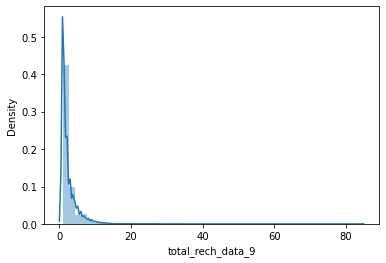

In [306]:
sns.distplot(data['total_rech_data_9'])

In [307]:
#interpolating for null values - for all recharge columns 
data[['total_rech_data_9','total_rech_data_8','total_rech_data_7','total_rech_data_6','max_rech_data_9','max_rech_data_8','max_rech_data_7','max_rech_data_6','count_rech_2g_9','count_rech_2g_8','count_rech_2g_7','count_rech_2g_6','count_rech_3g_9','count_rech_3g_8','count_rech_3g_7','count_rech_3g_6','av_rech_amt_data_9','av_rech_amt_data_8','av_rech_amt_data_7','av_rech_amt_data_6','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_9','arpu_2g_8','arpu_2g_7','arpu_2g_6']]=data[['total_rech_data_9','total_rech_data_8','total_rech_data_7','total_rech_data_6','max_rech_data_9','max_rech_data_8','max_rech_data_7','max_rech_data_6','count_rech_2g_9','count_rech_2g_8','count_rech_2g_7','count_rech_2g_6','count_rech_3g_9','count_rech_3g_8','count_rech_3g_7','count_rech_3g_6','av_rech_amt_data_9','av_rech_amt_data_8','av_rech_amt_data_7','av_rech_amt_data_6','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_9','arpu_2g_8','arpu_2g_7','arpu_2g_6']].interpolate(method='linear')

In [308]:
# Creating dummy variables for the remaining categorical variables and dropping null value cases:

# Creating dummy variables for the variable 'fb_user_6'
fb6 = pd.get_dummies(data['fb_user_6'], prefix='fb_user_6')
# Creating dummy variables for the variable 'fb_user_7'
fb7 = pd.get_dummies(data['fb_user_7'], prefix='fb_user_7')
# Creating dummy variables for the variable 'fb_user_8'
fb8 = pd.get_dummies(data['fb_user_8'], prefix='fb_user_8')
# Creating dummy variables for the variable 'fb_user_9'
fb9 = pd.get_dummies(data['fb_user_9'], prefix='fb_user_9')

data = pd.concat([data,fb6,fb7,fb8,fb9], axis=1)

data.shape

(99999, 234)

In [309]:
# As we have created dummies for the below variables, so we can drop them
data = data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9'], 1)

In [310]:
data.shape

(99999, 230)

In [311]:
# Creating dummy variables for the remaining categorical variables

# Creating dummy variables for the variable 'night_pck_user_6'
np6 = pd.get_dummies(data['night_pck_user_6'], prefix='night_pck_user_6')
# Creating dummy variables for the variable 'night_pck_user_7'
np7 = pd.get_dummies(data['night_pck_user_7'], prefix='night_pck_user_7')
# Creating dummy variables for the variable 'night_pck_user_8'
np8 = pd.get_dummies(data['night_pck_user_8'], prefix='night_pck_user_8')
# Creating dummy variables for the variable 'night_pck_user_9'
np9 = pd.get_dummies(data['night_pck_user_9'], prefix='night_pck_user_9')

data = pd.concat([data,np6,np7,np8,np9], axis=1)

data.shape

(99999, 238)

In [312]:
# As we have created dummies for the below variables, so we can drop them
data = data.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'], 1)

In [313]:
data.shape

(99999, 234)

In [314]:
# Creating dummy variables for the remaining categorical variables 

# Creating dummy variables for the variable 'date_of_last_rech_data_6'
dlr6 = pd.get_dummies(data['date_of_last_rech_data_6'], prefix='date_of_last_rech_data_6')
# Creating dummy variables for the variable 'date_of_last_rech_data_7'
dlr7 = pd.get_dummies(data['date_of_last_rech_data_7'], prefix='date_of_last_rech_data_7')
# Creating dummy variables for the variable 'date_of_last_rech_data_8'
dlr8 = pd.get_dummies(data['date_of_last_rech_data_8'], prefix='date_of_last_rech_data_8')
# Creating dummy variables for the variable 'date_of_last_rech_data_9'
dlr9 = pd.get_dummies(data['date_of_last_rech_data_9'], prefix='date_of_last_rech_data_9')

data = pd.concat([data,dlr6,dlr7,dlr8,dlr9], axis=1)

data.shape

(99999, 356)

In [315]:
# We have created dummies for the below variables, so we can drop them
data = data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'], 1)

In [316]:
data.shape

(99999, 352)

In [317]:
# Creating dummy variables for the remaining categorical variables

# Creating dummy variables for the variable 'date_of_last_rech_6'
dlrvoice6 = pd.get_dummies(data['date_of_last_rech_6'], prefix='date_of_last_rech_6')
# Creating dummy variables for the variable 'date_of_last_rech_7'
dlrvoice7 = pd.get_dummies(data['date_of_last_rech_7'], prefix='date_of_last_rech_7')
# Creating dummy variables for the variable 'date_of_last_rech_8'
dlrvoice8 = pd.get_dummies(data['date_of_last_rech_8'], prefix='date_of_last_rech_8')
# Creating dummy variables for the variable 'date_of_last_rech_data_9'
dlrvoice9 = pd.get_dummies(data['date_of_last_rech_9'], prefix='date_of_last_rech_9')

data = pd.concat([data,dlrvoice6,dlrvoice7,dlrvoice8,dlrvoice9], axis=1)

data.shape

(99999, 474)

In [318]:
# We have created dummies for the below variables, so we can drop them
data = data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'], 1)

In [319]:
data.shape

(99999, 470)

In [320]:
# Creating dummy variables for the remaining categorical variables 

# Creating dummy variables for the variable 'last_date_of_month_6'
lstdt6 = pd.get_dummies(data['last_date_of_month_6'], prefix='last_date_of_month_6')
# Creating dummy variables for the variable 'date_of_last_rech_7'
lstdt7 = pd.get_dummies(data['last_date_of_month_7'], prefix='last_date_of_month_7')
# Creating dummy variables for the variable 'date_of_last_rech_8'
lstdt8 = pd.get_dummies(data['last_date_of_month_8'], prefix='last_date_of_month_8')
# Creating dummy variables for the variable 'date_of_last_rech_data_9'
lstdt9 = pd.get_dummies(data['last_date_of_month_9'], prefix='last_date_of_month_9')

data = pd.concat([data,lstdt6,lstdt7,lstdt8,lstdt9], axis=1)

data.shape

(99999, 474)

In [321]:
# We have created dummies for the below variables, so we can drop them
data = data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'], 1)

 wouldnt it have been better if i had converted the dates into numbers and then scaled them???
 
 
 for minutes usage and recharge amt wouldnt it have been better to get values by regression????

In [322]:
data=data.dropna() # to remove remaining null values 

In [323]:
data.shape

(99997, 470)

##### creating good phase

In [324]:
data['good_phase_revenue']=data['av_rech_amt_data_6'] + data['av_rech_amt_data_7'] # column will combine revenue of 6 & 7 months
data['good_phase_revenue'].shape

(99997,)

In [325]:
# Checking percetiles at 25%, 50%, 7%, 90%, 95% and 99%
data['good_phase_revenue'].describe(percentiles=[.25, .5, .7, .90, .95, .99])

count    99997.000000
mean       392.371433
std        275.144055
min          2.000000
25%        239.500000
50%        335.500000
70%        438.391111
90%        655.800000
95%        827.590476
99%       1407.520000
max      10285.000000
Name: good_phase_revenue, dtype: float64

In [326]:
data[data['good_phase_revenue']>=438.391111].count() #filter o keep 70th percentile and higher

mobile_number                     29999
circle_id                         29999
loc_og_t2o_mou                    29999
std_og_t2o_mou                    29999
loc_ic_t2o_mou                    29999
                                  ...  
last_date_of_month_6_6/30/2014    29999
last_date_of_month_7_7/31/2014    29999
last_date_of_month_8_8/31/2014    29999
last_date_of_month_9_9/30/2014    29999
good_phase_revenue                29999
Length: 471, dtype: int64

In [327]:
data_high=data[data['good_phase_revenue']>=438.391111]#filter o keep 70th percentile and higher

In [328]:
data_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 22 to 99998
Columns: 471 entries, mobile_number to good_phase_revenue
dtypes: float64(172), int64(35), uint8(264)
memory usage: 55.2 MB


#### filtered data to 29.9K rows - data_high : only keeping high-value customers`

#### combining columns phone number and circle and set them as index for referencing

In [329]:
data_high['mobile_number_and_circle_id'] = data_high['mobile_number'].map(str)+'_'+ data_high['circle_id'].map(str)
data_high.set_index('mobile_number_and_circle_id',inplace = True)
data_high.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,date_of_last_rech_9_9/5/2014,date_of_last_rech_9_9/6/2014,date_of_last_rech_9_9/7/2014,date_of_last_rech_9_9/8/2014,date_of_last_rech_9_9/9/2014,last_date_of_month_6_6/30/2014,last_date_of_month_7_7/31/2014,last_date_of_month_8_8/31/2014,last_date_of_month_9_9/30/2014,good_phase_revenue
mobile_number_and_circle_id,,,,,,,,,,,,,,,,,,,,,
7001121249_109,7001121249,109,0.0,0.0,0.0,281.076,26.291,0.000,0.300,36.59,...,0,0,0,0,0,1,1,1,1,438.730769
7000887461_109,7000887461,109,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.96,...,0,0,0,0,0,1,1,1,1,482.307692
7000149764_109,7000149764,109,0.0,0.0,0.0,977.020,2362.833,409.230,799.356,0.00,...,0,0,0,0,0,1,1,1,1,3610.000000
7002022556_109,7002022556,109,0.0,0.0,0.0,50.037,401.320,145.312,107.324,3.26,...,0,0,0,0,0,1,1,1,1,947.500000
7002108620_109,7002108620,109,0.0,0.0,0.0,596.376,13.448,0.000,0.000,10.51,...,0,0,0,0,0,1,1,1,1,819.600000


### Add chruning flag - by combing volume and data column for month 9 and then dropping the same

In [330]:
data_high['churn_flag']=data_high[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(lambda x: 1 if x['total_ic_mou_9']==0 and x['total_og_mou_9']==0 and x['vol_2g_mb_9']==0 and x['vol_3g_mb_9']==0 else 0, axis=1)

In [331]:
data_high[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn_flag']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn_flag
mobile_number_and_circle_id,,,,,
7001121249_109,7.51,0.68,0.00,0.00,0
7000887461_109,127.48,127.63,13.93,314.74,0
7000149764_109,114.16,1.70,30.92,5588.11,0
7002022556_109,48.21,14.54,0.03,0.00,0
7002108620_109,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...
7002108597_109,135.29,1263.56,69.40,1777.24,0
7001792051_109,145.76,308.14,2.41,2989.96,0
7000630859_109,391.63,64.21,0.00,0.00,0


In [332]:
#removing _9 columns - pt1
data3 = data_high.drop(['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9','std_ic_mou_9','total_ic_mou_9','total_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9','max_rech_amt_9','last_day_rch_amt_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_3g_9','arpu_2g_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9_0.0','fb_user_9_1.0'], 1)

In [333]:
data3.shape

(29999, 422)

In [334]:
#removing _9 columns - pt2

data3 = data3.drop(['night_pck_user_9_0.0','night_pck_user_9_1.0','date_of_last_rech_data_9_9/10/2014','date_of_last_rech_data_9_9/11/2014','date_of_last_rech_data_9_9/12/2014','date_of_last_rech_data_9_9/13/2014','date_of_last_rech_data_9_9/14/2014','date_of_last_rech_data_9_9/15/2014','date_of_last_rech_data_9_9/16/2014','date_of_last_rech_data_9_9/17/2014','date_of_last_rech_data_9_9/18/2014','date_of_last_rech_data_9_9/19/2014','date_of_last_rech_data_9_9/2/2014','date_of_last_rech_data_9_9/20/2014','date_of_last_rech_data_9_9/21/2014','date_of_last_rech_data_9_9/22/2014','date_of_last_rech_data_9_9/23/2014','date_of_last_rech_data_9_9/24/2014','date_of_last_rech_data_9_9/25/2014','date_of_last_rech_data_9_9/26/2014','date_of_last_rech_data_9_9/27/2014','date_of_last_rech_data_9_9/28/2014','date_of_last_rech_data_9_9/29/2014','date_of_last_rech_data_9_9/3/2014','date_of_last_rech_data_9_9/30/2014','date_of_last_rech_data_9_9/4/2014','date_of_last_rech_data_9_9/5/2014','date_of_last_rech_data_9_9/6/2014','date_of_last_rech_data_9_9/7/2014','date_of_last_rech_data_9_9/8/2014','date_of_last_rech_data_9_9/9/2014','date_of_last_rech_9_9/1/2014','date_of_last_rech_9_9/10/2014','date_of_last_rech_9_9/11/2014','date_of_last_rech_9_9/12/2014','date_of_last_rech_9_9/13/2014','date_of_last_rech_9_9/14/2014','date_of_last_rech_9_9/15/2014','date_of_last_rech_9_9/16/2014','date_of_last_rech_9_9/17/2014','date_of_last_rech_9_9/18/2014','date_of_last_rech_9_9/19/2014','date_of_last_rech_9_9/2/2014','date_of_last_rech_9_9/20/2014','date_of_last_rech_9_9/21/2014','date_of_last_rech_9_9/22/2014','date_of_last_rech_9_9/23/2014','date_of_last_rech_9_9/24/2014','date_of_last_rech_9_9/25/2014','date_of_last_rech_9_9/26/2014','date_of_last_rech_9_9/27/2014','date_of_last_rech_9_9/28/2014','date_of_last_rech_9_9/29/2014','date_of_last_rech_9_9/3/2014','date_of_last_rech_9_9/30/2014','date_of_last_rech_9_9/4/2014','date_of_last_rech_9_9/5/2014','date_of_last_rech_9_9/6/2014','date_of_last_rech_9_9/7/2014','date_of_last_rech_9_9/8/2014','date_of_last_rech_9_9/9/2014','last_date_of_month_9_9/30/2014'], 1)

In [335]:
data3.shape

(29999, 360)

#### Derving features

fact 1: since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase
 - Action 1: we can combine 6&7 to get good phase: not a good idea - lots of columns + how will you combine dates of 6&7?



fact 2: out of revenue and usage based, you will use the usage-based definition to define churn
 - Action 2: do we need revenue based data even for this project?
 
 
deriving new metrics: can we segment usage? - high low and Medium?? How would we use the same for regression?? we already have the high-value customer in data!



 #### Next Steps
 1. Managing class imbalance
 2. train test split
 i. Feature Scaling
 3. PCA
 4. Logistic Regression and AUC Score
 5. Decision Tree and AUC Score - incl Hyperparameter tuning
 6. XGBoost and Scores - incl Hyperparameter tuning
 7. Do the same by removing Revenue
 8. Finalize results

#### Managing Class Imbalance

In [336]:
#identifying current churn rate
data3['churn_flag'].value_counts(normalize=True)

0    0.903897
1    0.096103
Name: churn_flag, dtype: float64

##### Churn rate is only 9% of total data - hence class balancing is necessary

###### Method to be applied - Resampling Techniques — Oversample minority class

First, we'll split into test and train sets BEFORE trying oversampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

## Step 3: Train -Test Split

1. Upsampling minority
2. Feature Scaling to normalize values
3. Applying PCA - dimensionality reduction for faster processing

In [337]:
from sklearn.model_selection import train_test_split

In [338]:
# Putting feature variable to X
X = data3.drop(['churn_flag','mobile_number','circle_id','good_phase_revenue'], axis=1)

X.shape

(29999, 356)

In [339]:
# Putting response variable to y
y = data3['churn_flag']

y.shape

(29999,)

In [340]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42, stratify=y)

In [341]:
X_train.shape

(20999, 356)

In [342]:
y_train.shape

(20999,)

In [343]:
y_train.value_counts(normalize=True)

0    0.9039
1    0.0961
Name: churn_flag, dtype: float64

In [344]:
y_test.value_counts(normalize=True)

0    0.903889
1    0.096111
Name: churn_flag, dtype: float64

In [345]:
#concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.shape

(20999, 357)

In [346]:
# separate minority and majority classes
not_churn = X[X.churn_flag==0]
churn = X[X.churn_flag==1]
churn.shape

(2018, 357)

In [347]:
not_churn.shape

(18981, 357)

In [348]:
from sklearn.utils import resample
#upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results
churn_upsampled.shape

(18981, 357)

In [349]:
#combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])
upsampled.shape

(37962, 357)

In [350]:
upsampled.churn_flag.value_counts()

0    18981
1    18981
Name: churn_flag, dtype: int64

In [351]:
y_train = upsampled.churn_flag
X_train = upsampled.drop('churn_flag', axis=1)

### Feature Scaling

In [352]:
X_train.shape

(37962, 356)

In [353]:
from sklearn.preprocessing import StandardScaler

In [354]:
#printing out all columns
features= list(X_train)
print(features)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'to

In [355]:
scaler = StandardScaler()

X_train[['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']]=scaler.fit_transform(X_train[['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']])

X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,date_of_last_rech_8_8/31/2014,date_of_last_rech_8_8/4/2014,date_of_last_rech_8_8/5/2014,date_of_last_rech_8_8/6/2014,date_of_last_rech_8_8/7/2014,date_of_last_rech_8_8/8/2014,date_of_last_rech_8_8/9/2014,last_date_of_month_6_6/30/2014,last_date_of_month_7_7/31/2014,last_date_of_month_8_8/31/2014
mobile_number_and_circle_id,,,,,,,,,,,,,,,,,,,,,
7002049668_109,0.0,0.0,0.0,-0.247191,-0.197208,-0.313623,-0.310725,-0.260824,-0.275027,-0.219984,...,0,0,1,0,0,0,0,1,1,1
7000937354_109,0.0,0.0,0.0,0.213275,0.287068,-0.268053,-0.253024,-0.151617,-0.250964,0.002858,...,0,0,0,0,0,0,0,1,1,1
7001439111_109,0.0,0.0,0.0,-0.658413,-0.705633,-0.217257,-0.345892,-0.293930,0.250261,-0.521730,...,0,0,0,0,0,0,0,1,1,1
7001925801_109,0.0,0.0,0.0,-0.580439,-0.449087,1.081536,-0.286187,-0.123549,0.070581,-0.510518,...,1,0,0,0,0,0,0,1,1,1
7000965172_109,0.0,0.0,0.0,-0.405825,-0.295089,-0.115249,-0.394270,-0.333607,-0.094228,-0.125710,...,0,0,0,0,0,0,0,1,1,1


### PCA on data

In [356]:
X_train.shape

(37962, 356)

In [357]:
from sklearn.decomposition import PCA

In [358]:
pca = PCA(random_state=42)

In [359]:
pca.fit(X_train)

PCA(random_state=42)

### Components from the PCA

In [360]:
pca.components_

array([[ 1.84813298e-19, -5.55111512e-17,  3.33066907e-16, ...,
         0.00000000e+00,  5.57517289e-03,  7.86515186e-03],
       [ 2.41246037e-19, -1.94289029e-16, -2.77555756e-17, ...,
         0.00000000e+00, -1.15112549e-03, -2.17412324e-03],
       [ 8.90377740e-19, -0.00000000e+00, -5.55111512e-17, ...,
        -0.00000000e+00,  8.75568347e-05,  3.83946223e-04],
       ...,
       [-0.00000000e+00,  8.83986368e-02, -1.76627591e-02, ...,
        -0.00000000e+00,  5.06186889e-18, -8.57874969e-17],
       [-0.00000000e+00,  1.00306218e-01,  1.85819584e-02, ...,
        -0.00000000e+00,  1.12062459e-16, -8.55028938e-17],
       [ 0.00000000e+00,  7.87279735e-02,  1.92135265e-02, ...,
         0.00000000e+00, -3.74456325e-16,  4.26362504e-17]])

In [361]:
pca.explained_variance_ratio_

array([1.12918845e-01, 6.35653870e-02, 5.63489018e-02, 4.26708018e-02,
       3.49359848e-02, 3.30740704e-02, 2.91681010e-02, 2.63639896e-02,
       2.46570444e-02, 2.18973593e-02, 2.05285972e-02, 1.93794198e-02,
       1.85522621e-02, 1.76268277e-02, 1.69381983e-02, 1.64109732e-02,
       1.55628256e-02, 1.54833281e-02, 1.45775971e-02, 1.35053608e-02,
       1.31276431e-02, 1.22081838e-02, 1.14774811e-02, 1.11825053e-02,
       1.07315330e-02, 1.04262998e-02, 1.00628217e-02, 9.08044994e-03,
       8.98086641e-03, 8.66138585e-03, 8.32618264e-03, 8.22418050e-03,
       7.45390570e-03, 7.21510055e-03, 6.87844298e-03, 6.76831626e-03,
       6.71830048e-03, 6.57416917e-03, 6.37971530e-03, 6.24300376e-03,
       6.03260412e-03, 5.78709382e-03, 5.72128932e-03, 5.59752348e-03,
       5.46969107e-03, 5.27143183e-03, 5.15913850e-03, 4.92727449e-03,
       4.88327086e-03, 4.65088968e-03, 4.37403591e-03, 4.23424286e-03,
       4.23128100e-03, 4.02303118e-03, 3.88844360e-03, 3.83432748e-03,
      

Making a scree plot for the explained variance

In [362]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

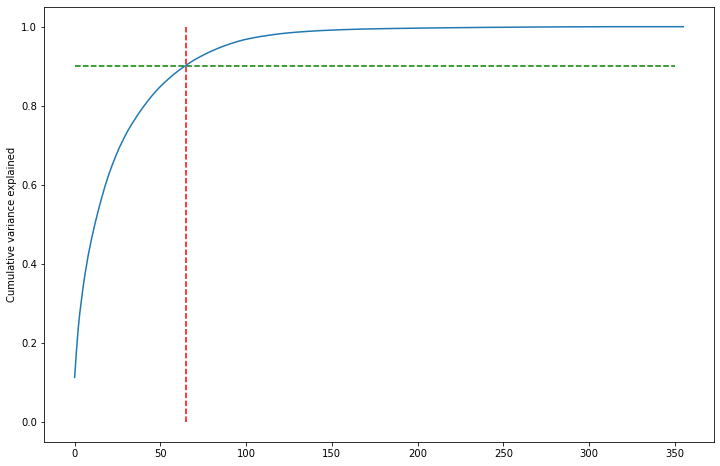

In [363]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=350, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

hence top 65 components explain 90% variance

In [364]:
from sklearn.decomposition import IncrementalPCA

In [365]:
pca_final = IncrementalPCA(n_components=65)

In [366]:
pca_final

IncrementalPCA(n_components=65)

In [367]:
df_train_pca = pca_final.fit_transform(X_train)

In [368]:
df_train_pca.shape

(37962, 65)

In [369]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [370]:
corrmat.shape

(65, 65)

In [371]:
df_train_pca

array([[ 2.52223676, -1.85298072,  6.06368942, ..., -0.08948177,
        -0.24383905, -0.17761066],
       [ 2.87605781, -3.2050166 ,  2.63221518, ...,  0.82928747,
        -1.00205768, -0.7014556 ],
       [-2.0488941 , -1.47885702,  0.36481987, ..., -0.24675828,
         0.73695272,  0.42094878],
       ...,
       [ 1.17345574,  3.32613524, -0.32616052, ..., -0.03159317,
         1.04222108,  0.20566989],
       [-2.72863385, -0.58812661, -0.84680301, ..., -0.25021297,
        -0.06817848,  0.36310682],
       [-2.02275961, -0.83088611,  2.60364069, ...,  0.32784649,
        -1.73646428,  2.53197343]])

### Applying 1) Re-sampling 2) Feature Scaling and 3) PCA on test data

In [372]:
#concatenate our test data back together
X_test_comb = pd.concat([X_test, y_test], axis=1)
X_test_comb.shape

(9000, 357)

In [373]:
# separate minority and majority classes
not_churn = X_test_comb[X_test_comb.churn_flag==0]
churn = X_test_comb[X_test_comb.churn_flag==1]
churn.shape

(865, 357)

In [374]:
not_churn.shape

(8135, 357)

In [375]:
from sklearn.utils import resample
#upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results
churn_upsampled.shape

(8135, 357)

In [376]:
#combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])
upsampled.shape

(16270, 357)

In [377]:
upsampled.churn_flag.value_counts()

0    8135
1    8135
Name: churn_flag, dtype: int64

In [378]:
y_test = upsampled.churn_flag
X_test = upsampled.drop('churn_flag', axis=1)

In [379]:
X_test.shape

(16270, 356)

In [380]:
y_test.shape

(16270,)

#### feature Scaling

In [381]:
X_test[['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']]=scaler.transform(X_test[['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']])


Apply transformation on test set

In [382]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(16270, 65)

## Step 4: Data Modelling on Principal component:
1. Applying logistic Regression 
2. Applying Random Forest - with Hyperparamterization
3. Applying XGBoost

-  Summarising results by capturing accuracy, AUC Scores and Recall scores for all and selecting the most appropriate model of them all

### 1. Applying Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
learner_pca = LogisticRegression()

In [126]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [127]:
y_train_pred=learner_pca.predict(df_train_pca)

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [129]:
log_accuracy_tr=accuracy_score(y_train,y_train_pred)
log_accuracy_tr

0.8512723249565355

In [130]:
confusion=confusion_matrix(y_train,y_train_pred)
confusion

array([[15346,  3635],
       [ 2011, 16970]], dtype=int64)

In [131]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84     18981
           1       0.82      0.89      0.86     18981

    accuracy                           0.85     37962
   macro avg       0.85      0.85      0.85     37962
weighted avg       0.85      0.85      0.85     37962



In [132]:
#churn-yes -predicted =16962
#churn- yes-actual=16962+2019
#Nchurn-yes-predicted=15365
#Nchurn-yes-total=15365+3616

In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8940519466835256

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.8084927032295454

In [136]:
# Calculate false postive rate - predicting conversion when customer has not have converted
print(FP/ float(TN+FP))

0.19150729677045467


In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.8235865081290948


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8841389641067005


In [140]:
#performance on unseen data
y_test_pred=learner_pca.predict(df_test_pca)

In [142]:
log_accuracy_tst=accuracy_score(y_test,y_test_pred)
log_accuracy_tst

0.8245851259987708

In [143]:
confusion_test_log=confusion_matrix(y_test,y_test_pred)
confusion_test_log

array([[6544, 1591],
       [1263, 6872]], dtype=int64)

In [204]:
recall_log=confusion_test_log[1,1]/(confusion_test_log[1,0]+confusion_test_log[1,1])
recall_log

0.8447449293177628

In [205]:
spec_log=confusion_test_log[0,0]/(confusion_test_log[0,0]+confusion_test_log[0,1])
spec_log

0.8044253226797787

In [145]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      8135
           1       0.81      0.84      0.83      8135

    accuracy                           0.82     16270
   macro avg       0.83      0.82      0.82     16270
weighted avg       0.83      0.82      0.82     16270



In [146]:
#performance on unseen data
y_test_pred_2=model_pca.predict_proba(df_test_pca)[:,1]

In [147]:
y_train_pred_2=model_pca.predict_proba(df_train_pca)[:,1]

In [148]:
#getting AUC Score
log_AUC_Test="{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred_2))
log_AUC_Test

'0.91'

In [149]:
log_AUC_Train="{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred_2))
log_AUC_Train

'0.92'

### 2. Applying Random Forest on Principal compnents

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rf_pca = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)

In [152]:
rf_pca.fit(df_train_pca, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

Performance on the train set

In [153]:
y_train_pred_rf=rf_pca.predict(df_train_pca)

In [154]:
rf_accuracy_train=accuracy_score(y_train,y_train_pred_rf)
rf_accuracy_train

1.0

##### seems like its overfitting the train data

##### Performance on unseen data

In [155]:
y_test_pred_rf=rf_pca.predict(df_test_pca)

In [156]:
rf_accuracy_test=accuracy_score(y_test,y_test_pred_rf)
rf_accuracy_test

0.6389059618930547

##### hence training data accuracy has misled us as the model has overfitted

### Model evaluation:Cross validation

In [279]:
from sklearn.model_selection import cross_val_score

In [280]:
cross_val_score(learner_pca, df_train_pca, y_train, cv=5, n_jobs=-1)

array([0.84709601, 0.84617411, 0.8495785 , 0.84839305, 0.85313488])

In [281]:
cross_val_score(rf_pca, df_train_pca, y_train, cv=5, n_jobs=-1)

array([0.98643487, 0.98827868, 0.98893572, 0.98893572, 0.98682824])

In [282]:
rf_pca.oob_score_

0.9904114640956746

In [157]:
cross_val_score(rf_pca, df_train_pca, y_train, cv=5, n_jobs=-1, scoring="recall")

array([1.        , 0.99947327, 1.        , 1.        , 0.99815595])

In [158]:
cross_val_score(rf_pca, df_train_pca, y_train, cv=5, n_jobs=-1).mean()

0.9878826471667029

In [159]:
rf_pca.oob_score_

0.9904114640956746

oob score is pretty similiar to cross val score

### Hyper-parameter Tuning using CV

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [161]:
rf_pca_cv = RandomForestClassifier(random_state=42, n_jobs=-1)

In [162]:
#hyper_params={'max_depth':[5,10,20,30,50],'min_samples_leaf':[20,50,100,200],'n_estimators':[10,25,50,80,100]}

#### we will directly move to Randomized SearchCV as it has a faster processing than GridSearchCV

### Applying RandomizedCV for faster processing

### Randomized searchCV

In [165]:
from sklearn.model_selection import RandomizedSearchCV

In [166]:
hyper_params = {'max_depth': range(3, 50),
                'max_features': range(3, 60),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

In [167]:
model_rcv = RandomizedSearchCV(estimator=rf_pca_cv, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)


In [168]:
model_rcv.fit(df_train_pca, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 50),
                                        'max_features': range(3, 60),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, verbose=1)

In [169]:
model_rcv.best_score_

0.9490018120233585

In [170]:
model_rcv.best_estimator_

RandomForestClassifier(max_depth=30, max_features=45, min_samples_leaf=20,
                       n_estimators=60, n_jobs=-1, random_state=42)

In [171]:
rf_best = model_rcv.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, max_features=45, min_samples_leaf=20,
                       n_estimators=60, n_jobs=-1, random_state=42)

In [172]:
y_test_pred = rf_best.predict(df_test_pca)

In [173]:
rf_accuracy_test=accuracy_score(y_test, y_test_pred)
rf_accuracy_test

0.7886908420405655

In [174]:
print('AUC on train data by RF-RandoizedSearchCV =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=rf_best.predict_proba(df_train_pca)[:, 1]))

RF_AUC_Train=metrics.roc_auc_score(y_true=y_train,y_score=rf_best.predict_proba(df_train_pca)[:, 1])

AUC on train data by RF-RandoizedSearchCV = 0.9965390344384297


In [175]:
print('AUC on test data by RF-RandoizedSearchCV =', metrics.roc_auc_score(y_true=y_test,
                                                              y_score=rf_best.predict_proba(df_test_pca)[:, 1]))

RF_AUC_Test=metrics.roc_auc_score(y_true=y_test,y_score=rf_best.predict_proba(df_test_pca)[:, 1])

AUC on test data by RF-RandoizedSearchCV = 0.8915314365110277


In [176]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.81      8135
           1       0.90      0.65      0.75      8135

    accuracy                           0.79     16270
   macro avg       0.81      0.79      0.78     16270
weighted avg       0.81      0.79      0.78     16270



In [177]:
confusion_test_rf=confusion_matrix(y_test,y_test_pred)
confusion_test_rf

array([[7555,  580],
       [2858, 5277]], dtype=int64)

In [178]:
recall_rf=confusion_test_rf[1,1]/(confusion_test_rf[1,0]+confusion_test_rf[1,1])
recall_rf

0.6486785494775661

In [202]:
spec_rf=confusion_test_rf[0,0]/(confusion_test_rf[0,0]+confusion_test_rf[0,1])
spec_rf

0.9287031346035648

### 3. Applying  XGBoost on PCA compenents

In [179]:
import xgboost as xgb
from sklearn import metrics


xgclf = xgb.XGBClassifier()

xgclf.fit(df_train_pca, y_train)

[09:24:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
y_train_pred=xgclf.predict(df_train_pca)

In [181]:
xgb_accuracy_tr=accuracy_score(y_train,y_train_pred)
xgb_accuracy_tr

0.9992360781834466

In [182]:
#performance on unseen data
y_test_pred=xgclf.predict(df_test_pca)

In [183]:
xgb_accuracy_tst=accuracy_score(y_test,y_test_pred)
xgb_accuracy_tst

0.7502151198524892

In [184]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xgclf.predict_proba(df_train_pca)[:, 1]))
XGB_AUC_Train=metrics.roc_auc_score(y_true=y_train,y_score=xgclf.predict_proba(df_train_pca)[:, 1])

AUC on train data by XGBoost = 0.9999999472629998


In [185]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(df_test_pca)[:, 1]))
XGB_AUC_Test=metrics.roc_auc_score(y_true=y_test,y_score=xgclf.predict_proba(df_test_pca)[:, 1])

AUC on test data by XGBoost = 0.8932881623827172


In [186]:
from sklearn import model_selection


# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgclf,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=5,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(df_train_pca, y_train)

[09:25:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
           

In [187]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9966246940861117
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


##### only if we improve on "best_score_"(i.e. better than best_score 0.9966246940861117), only then exploring more on any hyperparameter makes sense. since the best score value is very close to 1, we can avoid any hyperrarameterisation

In [188]:
xgb_best=clf_xgb.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [192]:
y_train_pred_2 = xgb_best.predict(df_train_pca)
y_test_pred_2 = xgb_best.predict(df_test_pca)

In [193]:
XGB_accuracy_train=accuracy_score(y_train,y_train_pred_2)
XGB_accuracy_train

0.9992360781834466

In [194]:
XGB_accuracy_test=accuracy_score(y_test,y_test_pred_2)
XGB_accuracy_test

0.7502151198524892

In [195]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgclf,df_train_pca,y_train,cv=10)
print(score)

[09:26:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:26:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:26:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:26:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [197]:
print(classification_report(y_test,y_test_pred_2))

              precision    recall  f1-score   support

           0       0.68      0.95      0.79      8135
           1       0.92      0.55      0.69      8135

    accuracy                           0.75     16270
   macro avg       0.80      0.75      0.74     16270
weighted avg       0.80      0.75      0.74     16270



In [198]:
confusion_test_xg=confusion_matrix(y_test,y_test_pred)
confusion_test_xg

array([[7765,  370],
       [3694, 4441]], dtype=int64)

In [199]:
recall_xg=confusion_test_xg[1,1]/(confusion_test_xg[1,0]+confusion_test_xg[1,1])
recall_xg

0.5459127228027043

In [200]:
spec_xg=confusion_test_xg[0,0]/(confusion_test_xg[0,0]+confusion_test_xg[0,1])
spec_xg

0.9545175169022742

### Evaluation: which one is best of the three classifiers

In [206]:
# Define a dictionary containing employee data
model_evaluation = {'Model_type':['Logistic', 'Random Forest', 'XGBoost'],
        'Accuracy_Test':[log_accuracy_tst, rf_accuracy_test, XGB_accuracy_test ],
        'AUC_Score_Train':[log_AUC_Train, RF_AUC_Train, XGB_AUC_Train],
        'AUC_Score_Test':[log_AUC_Test, RF_AUC_Test, XGB_AUC_Test],
        'Churners predicted accurately':[recall_log, recall_rf, recall_xg],
        'Non-Churners predicted accurately':[spec_log, spec_rf, spec_xg],
                 }


df=pd.DataFrame(model_evaluation)
df


,Model_type,Accuracy_Test,AUC_Score_Train,AUC_Score_Test,Churners predicted accurately,Non-Churners predicted accurately
0,Logistic,0.824585,0.92,0.91,0.844745,0.804425
1,Random Forest,0.788691,0.996539,0.891531,0.648679,0.928703
2,XGBoost,0.750215,1.0,0.893288,0.545913,0.954518


## the classifier that best predicts churners with the highest AUC Score for test - logistic regression 

## Step 5: Running logistic regression on pre-PCA data to:

- identifying important predictors- trying both Logistic Regression and Random Forest
- visualise the relation with target(i.e. Churn flag)
- provide recommendation

In [383]:
X_train.shape # to ensure that rescaling (for class imbalance) and feature scaling has been applied

(37962, 356)

In [384]:
X_test.shape

(16270, 356)

In [385]:
y_train.shape

(37962,)

In [386]:
y_test.shape

(16270,)

In [387]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit()

### Feature Selection using RFE

In [412]:
from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression()

In [413]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,date_of_last_rech_8_8/31/2014,date_of_last_rech_8_8/4/2014,date_of_last_rech_8_8/5/2014,date_of_last_rech_8_8/6/2014,date_of_last_rech_8_8/7/2014,date_of_last_rech_8_8/8/2014,date_of_last_rech_8_8/9/2014,last_date_of_month_6_6/30/2014,last_date_of_month_7_7/31/2014,last_date_of_month_8_8/31/2014
mobile_number_and_circle_id,,,,,,,,,,,,,,,,,,,,,
7002049668_109,0.0,0.0,0.0,-0.247191,-0.197208,-0.313623,-0.310725,-0.260824,-0.275027,-0.219984,...,0,0,1,0,0,0,0,1,1,1
7000937354_109,0.0,0.0,0.0,0.213275,0.287068,-0.268053,-0.253024,-0.151617,-0.250964,0.002858,...,0,0,0,0,0,0,0,1,1,1
7001439111_109,0.0,0.0,0.0,-0.658413,-0.705633,-0.217257,-0.345892,-0.293930,0.250261,-0.521730,...,0,0,0,0,0,0,0,1,1,1
7001925801_109,0.0,0.0,0.0,-0.580439,-0.449087,1.081536,-0.286187,-0.123549,0.070581,-0.510518,...,1,0,0,0,0,0,0,1,1,1
7000965172_109,0.0,0.0,0.0,-0.405825,-0.295089,-0.115249,-0.394270,-0.333607,-0.094228,-0.125710,...,0,0,0,0,0,0,0,1,1,1


In [389]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg2, 90)             # running RFE with 90 variables as output - as we want to be conservative
rfe = rfe.fit(X_train, y_train)

In [390]:
col = X_train.columns[rfe.support_]

In [391]:
X_train.columns[~rfe.support_] # list of columns that have been excluded

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'date_of_last_rech_8_8/2/2014', 'date_of_last_rech_8_8/20/2014',
       'date_of_last_rech_8_8/21/2014', 'date_of_last_rech_8_8/22/2014',
       'date_of_last_rech_8_8/25/2014', 'date_of_last_rech_8_8/26/2014',
       'date_of_last_rech_8_8/28/2014', 'date_of_last_rech_8_8/4/2014',
       'date_of_last_rech_8_8/5/2014', 'date_of_last_rech_8_8/7/2014'],
      dtype='object', length=266)

In [392]:
X_train_1=X_train[col]
X_train_1.shape

(37962, 90)

In [225]:
#re-running log regression
#X_train_sm = sm.add_constant(X_train_1)
#logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
#res = logm2.fit()

In [226]:
from sklearn.feature_selection import RFECV

In [227]:
rfecv = RFECV(estimator=logreg2, cv=4)

In [228]:
rfecv.fit(X_train, y_train)

RFECV(cv=4, estimator=LogisticRegression())

In [229]:
rfecv.n_features_

344

### hence we re not using rfecv for further modelling

In [393]:
X_train_sm = sm.add_constant(X_train_1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_flag   No. Observations:                37962
Model:                            GLM   Df Residuals:                    37872
Model Family:                Binomial   Df Model:                           89
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 09 Mar 2022   Deviance:                       25267.
Time:                        23:06:59   Pearson chi2:                 1.31e+05
No. Iterations:                    34                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
arpu_7                                 0.8607      0.070     12.303      0.000       0.724       0.998
arpu_8                                 0.6362      0.066      9.621      0.000       0.507       0.766
std_og_mou_6                           0.4880      0.026     18.948      0.000       0.438       0.538
total_og_mou_8                        -0.7028      0.031    -22.669      0.000      -0.764      -0.642
loc_ic_t2m_mou_7                       0.4572      0.037     12.459      0.000       0.385       0.529
loc_ic_t2m_mou_8                      -0.6095      0.099     -6.182      0.000      -0.803      -0.416
loc_ic_mou_8                          -1.6892      0.100    -16.922      0.000      -1.885      -1.494
spl_ic_mou_9                        -725.7719   2.39e+05     -0.003      0.998   -4.69e+05    4.68e+05
total_rech_amt_7                      -0.4774      0.068     -7.032      0.000      -0.611      -0.344
total_rech_amt_8                      -0.5316      0.063     -8.429      0.000      -0.655      -0.408
aon                                   -0.5787      0.017    -34.067      0.000      -0.612      -0.545
sep_vbc_3g                            -0.4423      0.060     -7.314      0.000      -0.561      -0.324
fb_user_8_1.0                         -1.7339      0.067    -25.798      0.000      -1.866      -1.602
night_pck_user_8_1.0                  -1.2970      0.438     -2.961      0.003      -2.156      -0.438
date_of_last_rech_data_6_6/13/2014     0.8062      0.207      3.901      0.000       0.401       1.211
date_of_last_rech_data_6_6/15/2014     0.7254      0.229      3.163      0.002       0.276       1.175
date_of_last_rech_data_6_6/16/2014     0.8727      0.187      4.667      0.000       0.506       1.239
date_of_last_rech_data_6_6/18/2014    -0.8703      0.229     -3.797      0.000      -1.320      -0.421
date_of_last_rech_data_6_6/19/2014     0.8814      0.182      4.843      0.000       0.525       1.238
date_of_last_rech_data_6_6/21/2014     0.8754      0.160      5.479      0.000       0.562       1.189
date_of_last_rech_data_6_6/22/2014     0.7942      0.177      4.479      0.000       0.447       1.142
date_of_last_rech_data_6_6/23/2014     0.8059      0.177      4.549      0.000       0.459       1.153
date_of_last_rech_data_6_6/25/2014     0.6647      0.154      4.310      0.000       0.362       0.967
date_of_last_rech_data_6_6/27/2014    -0.6449      0.168     -3.842      0.000      -0.974      -0.316
date_of_last_rech_data_6_6/4/2014      0.6798      0.288      2.359      0.018       0.115       1.245
date_of_last_rech_data_6_6/9/2014      0.7686      0.223      3.439      0.001       0.331       1.207
date_of_last_rech_data_7_7/1/2014      0.8815      0.369      2.388      0.017       0.158      

In [394]:
# will remove multiple columns, where p value is greater than 0.05 -

X = X_train_1.drop(['spl_ic_mou_9','date_of_last_rech_data_7_7/4/2014','date_of_last_rech_data_9_9/1/2014','date_of_last_rech_data_9_9/1/2014','date_of_last_rech_data_9_9/1/2014','last_date_of_month_7_7/31/2014'],axis=1)

In [395]:
#re-run the model and check statistics
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_flag   No. Observations:                37962
Model:                            GLM   Df Residuals:                    37876
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15249.
Date:                Wed, 09 Mar 2022   Deviance:                       30498.
Time:                        23:07:02   Pearson chi2:                 2.67e+05
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
arpu_7                                 0.8764      0.067     13.163      0.000       0.746       1.007
arpu_8                                 0.6233      0.063      9.908      0.000       0.500       0.747
std_og_mou_6                           0.4839      0.023     21.063      0.000       0.439       0.529
total_og_mou_8                        -0.8053      0.030    -26.819      0.000      -0.864      -0.746
loc_ic_t2m_mou_7                       0.4837      0.035     13.757      0.000       0.415       0.553
loc_ic_t2m_mou_8                      -0.6426      0.098     -6.531      0.000      -0.835      -0.450
loc_ic_mou_8                          -1.8215      0.099    -18.341      0.000      -2.016      -1.627
total_rech_amt_7                      -0.4395      0.065     -6.777      0.000      -0.567      -0.312
total_rech_amt_8                      -0.5194      0.060     -8.634      0.000      -0.637      -0.401
aon                                   -0.4617      0.016    -29.184      0.000      -0.493      -0.431
sep_vbc_3g                            -0.5004      0.068     -7.393      0.000      -0.633      -0.368
fb_user_8_1.0                         -1.6696      0.063    -26.611      0.000      -1.793      -1.547
night_pck_user_8_1.0                  -1.0979      0.392     -2.803      0.005      -1.866      -0.330
date_of_last_rech_data_6_6/13/2014     0.7946      0.186      4.281      0.000       0.431       1.158
date_of_last_rech_data_6_6/15/2014     0.6913      0.210      3.291      0.001       0.280       1.103
date_of_last_rech_data_6_6/16/2014     0.8556      0.171      4.992      0.000       0.520       1.191
date_of_last_rech_data_6_6/18/2014    -0.8106      0.212     -3.821      0.000      -1.226      -0.395
date_of_last_rech_data_6_6/19/2014     0.9483      0.171      5.537      0.000       0.613       1.284
date_of_last_rech_data_6_6/21/2014     0.9500      0.150      6.349      0.000       0.657       1.243
date_of_last_rech_data_6_6/22/2014     0.6932      0.161      4.301      0.000       0.377       1.009
date_of_last_rech_data_6_6/23/2014     0.9208      0.166      5.534      0.000       0.595       1.247
date_of_last_rech_data_6_6/25/2014     0.5596      0.140      3.986      0.000       0.284       0.835
date_of_last_rech_data_6_6/27/2014    -0.5388      0.161     -3.353      0.001      -0.854      -0.224
date_of_last_rech_data_6_6/4/2014      0.6370      0.266      2.395      0.017       0.116       1.158
date_of_last_rech_data_6_6/9/2014      0.7540      0.202      3.740      0.000       0.359       1.149
date_of_last_rech_data_7_7/1/2014      0.6914      0.320      2.161      0.031       0.064       1.319
date_of_last_rech_data_7_7/14/2014    -0.8406      0.199     -4.217      0.000      -1.231      

In [396]:
X = X.drop(['date_of_last_rech_7_7/5/2014','last_date_of_month_6_6/30/2014','last_date_of_month_8_8/31/2014'],axis=1)

In [397]:
X.shape

(37962, 83)

In [398]:
#re-run the model and check statistics
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_flag   No. Observations:                37962
Model:                            GLM   Df Residuals:                    37878
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15758.
Date:                Wed, 09 Mar 2022   Deviance:                       31516.
Time:                        23:07:03   Pearson chi2:                 4.54e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4017      0.024     16.619      0.000       0.354       0.449
arpu_7                                 0.9426      0.067     14.103      0.000       0.812       1.074
arpu_8                                 0.6116      0.063      9.650      0.000       0.487       0.736
std_og_mou_6                           0.4727      0.023     20.457      0.000       0.427       0.518
total_og_mou_8                        -0.8145      0.030    -26.851      0.000      -0.874      -0.755
loc_ic_t2m_mou_7                       0.5091      0.036     14.320      0.000       0.439       0.579
loc_ic_t2m_mou_8                      -0.6858      0.100     -6.831      0.000      -0.883      -0.489
loc_ic_mou_8                          -1.9668      0.101    -19.470      0.000      -2.165      -1.769
total_rech_amt_7                      -0.5027      0.065     -7.737      0.000      -0.630      -0.375
total_rech_amt_8                      -0.5344      0.060     -8.856      0.000      -0.653      -0.416
aon                                   -0.4221      0.015    -27.727      0.000      -0.452      -0.392
sep_vbc_3g                            -0.4793      0.062     -7.732      0.000      -0.601      -0.358
fb_user_8_1.0                         -1.7619      0.063    -27.953      0.000      -1.885      -1.638
night_pck_user_8_1.0                  -0.9878      0.390     -2.531      0.011      -1.753      -0.223
date_of_last_rech_data_6_6/13/2014     0.7875      0.187      4.215      0.000       0.421       1.154
date_of_last_rech_data_6_6/15/2014     0.7229      0.208      3.472      0.001       0.315       1.131
date_of_last_rech_data_6_6/16/2014     0.8854      0.170      5.205      0.000       0.552       1.219
date_of_last_rech_data_6_6/18/2014    -0.9268      0.214     -4.333      0.000      -1.346      -0.508
date_of_last_rech_data_6_6/19/2014     0.9505      0.172      5.526      0.000       0.613       1.288
date_of_last_rech_data_6_6/21/2014     0.9508      0.154      6.179      0.000       0.649       1.252
date_of_last_rech_data_6_6/22/2014     0.6907      0.161      4.281      0.000       0.375       1.007
date_of_last_rech_data_6_6/23/2014     0.9186      0.166      5.518      0.000       0.592       1.245
date_of_last_rech_data_6_6/25/2014     0.5977      0.139      4.315      0.000       0.326       0.869
date_of_last_rech_data_6_6/27/2014    -0.5109      0.158     -3.227      0.001      -0.821      -0.201
date_of_last_rech_data_6_6/4/2014      0.5363      0.274      1.958      0.050      -0.000       1.073
date_of_last_rech_data_6_6/9/2014      0.6874      0.206      3.345      0.001       0.285       1.090
date_of_last_rech_data_7_7/1/2014      0.7159      0.318      2.252      0.024       0.093      

In [399]:
X = X.drop(['date_of_last_rech_7_7/14/2014','date_of_last_rech_data_8_8/29/2014','date_of_last_rech_data_6_6/4/2014'],axis=1)

In [400]:
#re-run the model and check statistics
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_flag   No. Observations:                37962
Model:                            GLM   Df Residuals:                    37881
Model Family:                Binomial   Df Model:                           80
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15763.
Date:                Wed, 09 Mar 2022   Deviance:                       31526.
Time:                        23:07:04   Pearson chi2:                 4.49e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4022      0.024     16.680      0.000       0.355       0.449
arpu_7                                 0.9424      0.067     14.101      0.000       0.811       1.073
arpu_8                                 0.6100      0.063      9.627      0.000       0.486       0.734
std_og_mou_6                           0.4720      0.023     20.446      0.000       0.427       0.517
total_og_mou_8                        -0.8134      0.030    -26.835      0.000      -0.873      -0.754
loc_ic_t2m_mou_7                       0.5038      0.036     14.184      0.000       0.434       0.573
loc_ic_t2m_mou_8                      -0.6830      0.100     -6.799      0.000      -0.880      -0.486
loc_ic_mou_8                          -1.9636      0.101    -19.442      0.000      -2.162      -1.766
total_rech_amt_7                      -0.5024      0.065     -7.731      0.000      -0.630      -0.375
total_rech_amt_8                      -0.5343      0.060     -8.859      0.000      -0.653      -0.416
aon                                   -0.4224      0.015    -27.745      0.000      -0.452      -0.393
sep_vbc_3g                            -0.4792      0.062     -7.727      0.000      -0.601      -0.358
fb_user_8_1.0                         -1.7792      0.062    -28.781      0.000      -1.900      -1.658
night_pck_user_8_1.0                  -0.9960      0.390     -2.554      0.011      -1.761      -0.232
date_of_last_rech_data_6_6/13/2014     0.7864      0.187      4.211      0.000       0.420       1.152
date_of_last_rech_data_6_6/15/2014     0.7254      0.208      3.490      0.000       0.318       1.133
date_of_last_rech_data_6_6/16/2014     0.8917      0.170      5.246      0.000       0.559       1.225
date_of_last_rech_data_6_6/18/2014    -0.9331      0.214     -4.369      0.000      -1.352      -0.514
date_of_last_rech_data_6_6/19/2014     0.9546      0.172      5.550      0.000       0.617       1.292
date_of_last_rech_data_6_6/21/2014     0.9476      0.154      6.165      0.000       0.646       1.249
date_of_last_rech_data_6_6/22/2014     0.6851      0.161      4.258      0.000       0.370       1.000
date_of_last_rech_data_6_6/23/2014     0.9074      0.166      5.458      0.000       0.582       1.233
date_of_last_rech_data_6_6/25/2014     0.5954      0.138      4.302      0.000       0.324       0.867
date_of_last_rech_data_6_6/27/2014    -0.5145      0.158     -3.257      0.001      -0.824      -0.205
date_of_last_rech_data_6_6/9/2014      0.6884      0.205      3.352      0.001       0.286       1.091
date_of_last_rech_data_7_7/1/2014      0.7023      0.317      2.216      0.027       0.081       1.323
date_of_last_rech_data_7_7/14/2014    -0.8230      0.193     -4.255      0.000      -1.202      

In [401]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,arpu_8,13.04
8,total_rech_amt_7,11.82
9,total_rech_amt_8,11.72
1,arpu_7,11.72
6,loc_ic_t2m_mou_8,5.14
...,...,...
61,date_of_last_rech_6_6/8/2014,1.01
60,date_of_last_rech_6_6/4/2014,1.01
59,date_of_last_rech_6_6/3/2014,1.01
55,date_of_last_rech_6_6/10/2014,1.01


In [402]:
X = X.drop(['arpu_8'],axis=1)

In [403]:
#re-run the model and check statistics
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_flag   No. Observations:                37962
Model:                            GLM   Df Residuals:                    37882
Model Family:                Binomial   Df Model:                           79
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15813.
Date:                Wed, 09 Mar 2022   Deviance:                       31626.
Time:                        23:07:24   Pearson chi2:                 4.70e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4038      0.024     16.775      0.000       0.357       0.451
arpu_7                                 0.8674      0.064     13.652      0.000       0.743       0.992
std_og_mou_6                           0.4668      0.023     20.301      0.000       0.422       0.512
total_og_mou_8                        -0.7787      0.030    -25.912      0.000      -0.838      -0.720
loc_ic_t2m_mou_7                       0.4844      0.036     13.573      0.000       0.414       0.554
loc_ic_t2m_mou_8                      -0.6406      0.101     -6.367      0.000      -0.838      -0.443
loc_ic_mou_8                          -1.9592      0.101    -19.366      0.000      -2.158      -1.761
total_rech_amt_7                      -0.3603      0.061     -5.923      0.000      -0.480      -0.241
total_rech_amt_8                      -0.0281      0.028     -1.014      0.311      -0.082       0.026
aon                                   -0.4215      0.015    -27.744      0.000      -0.451      -0.392
sep_vbc_3g                            -0.4610      0.060     -7.680      0.000      -0.579      -0.343
fb_user_8_1.0                         -1.7380      0.061    -28.272      0.000      -1.859      -1.618
night_pck_user_8_1.0                  -1.0154      0.388     -2.619      0.009      -1.775      -0.255
date_of_last_rech_data_6_6/13/2014     0.8419      0.188      4.470      0.000       0.473       1.211
date_of_last_rech_data_6_6/15/2014     0.7046      0.208      3.391      0.001       0.297       1.112
date_of_last_rech_data_6_6/16/2014     0.8748      0.171      5.112      0.000       0.539       1.210
date_of_last_rech_data_6_6/18/2014    -0.9505      0.213     -4.455      0.000      -1.369      -0.532
date_of_last_rech_data_6_6/19/2014     0.9413      0.171      5.509      0.000       0.606       1.276
date_of_last_rech_data_6_6/21/2014     0.9734      0.155      6.277      0.000       0.669       1.277
date_of_last_rech_data_6_6/22/2014     0.6719      0.161      4.184      0.000       0.357       0.987
date_of_last_rech_data_6_6/23/2014     0.9131      0.166      5.505      0.000       0.588       1.238
date_of_last_rech_data_6_6/25/2014     0.5957      0.139      4.290      0.000       0.323       0.868
date_of_last_rech_data_6_6/27/2014    -0.5182      0.158     -3.286      0.001      -0.827      -0.209
date_of_last_rech_data_6_6/9/2014      0.6999      0.205      3.422      0.001       0.299       1.101
date_of_last_rech_data_7_7/1/2014      0.6615      0.319      2.077      0.038       0.037       1.286
date_of_last_rech_data_7_7/14/2014    -0.7794      0.194     -4.021      0.000      -1.159      -0.399
date_of_last_rech_data_7_7/16/2014    -0.7143      0.198     -3.602      0.000      -1.103      

In [404]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_7,11.58
7,total_rech_amt_7,11.07
5,loc_ic_t2m_mou_8,5.14
6,loc_ic_mou_8,3.99
8,total_rech_amt_8,2.90
...,...,...
59,date_of_last_rech_6_6/4/2014,1.01
58,date_of_last_rech_6_6/3/2014,1.01
54,date_of_last_rech_6_6/10/2014,1.01
35,date_of_last_rech_data_7_7/6/2014,1.01


In [405]:
X = X.drop(['arpu_7'],axis=1)

In [406]:
#re-run the model and check statistics
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_flag   No. Observations:                37962
Model:                            GLM   Df Residuals:                    37883
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15916.
Date:                Wed, 09 Mar 2022   Deviance:                       31832.
Time:                        23:07:44   Pearson chi2:                 2.32e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3840      0.024     15.926      0.000       0.337       0.431
std_og_mou_6                           0.4952      0.023     21.533      0.000       0.450       0.540
total_og_mou_8                        -0.7905      0.030    -26.227      0.000      -0.850      -0.731
loc_ic_t2m_mou_7                       0.5364      0.035     15.191      0.000       0.467       0.606
loc_ic_t2m_mou_8                      -0.6741      0.100     -6.769      0.000      -0.869      -0.479
loc_ic_mou_8                          -1.9800      0.101    -19.674      0.000      -2.177      -1.783
total_rech_amt_7                       0.4130      0.025     16.418      0.000       0.364       0.462
total_rech_amt_8                       0.0546      0.027      2.018      0.044       0.002       0.108
aon                                   -0.4181      0.015    -27.655      0.000      -0.448      -0.388
sep_vbc_3g                            -0.4436      0.060     -7.350      0.000      -0.562      -0.325
fb_user_8_1.0                         -1.7404      0.061    -28.424      0.000      -1.860      -1.620
night_pck_user_8_1.0                  -1.0153      0.387     -2.622      0.009      -1.774      -0.256
date_of_last_rech_data_6_6/13/2014     0.8450      0.187      4.519      0.000       0.478       1.212
date_of_last_rech_data_6_6/15/2014     0.7184      0.206      3.492      0.000       0.315       1.122
date_of_last_rech_data_6_6/16/2014     0.9248      0.173      5.359      0.000       0.587       1.263
date_of_last_rech_data_6_6/18/2014    -0.8456      0.205     -4.127      0.000      -1.247      -0.444
date_of_last_rech_data_6_6/19/2014     0.9370      0.169      5.539      0.000       0.605       1.269
date_of_last_rech_data_6_6/21/2014     1.0043      0.153      6.569      0.000       0.705       1.304
date_of_last_rech_data_6_6/22/2014     0.6570      0.160      4.108      0.000       0.344       0.970
date_of_last_rech_data_6_6/23/2014     1.0115      0.164      6.176      0.000       0.691       1.332
date_of_last_rech_data_6_6/25/2014     0.5683      0.138      4.125      0.000       0.298       0.838
date_of_last_rech_data_6_6/27/2014    -0.4663      0.157     -2.968      0.003      -0.774      -0.158
date_of_last_rech_data_6_6/9/2014      0.7365      0.203      3.632      0.000       0.339       1.134
date_of_last_rech_data_7_7/1/2014      0.5963      0.322      1.853      0.064      -0.035       1.227
date_of_last_rech_data_7_7/14/2014    -0.5774      0.188     -3.072      0.002      -0.946      -0.209
date_of_last_rech_data_7_7/16/2014    -0.5416      0.196     -2.765      0.006      -0.926      -0.158
date_of_last_rech_data_7_7/17/2014    -1.0372      0.217     -4.786      0.000      -1.462      

In [407]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_t2m_mou_8,5.13
5,loc_ic_mou_8,3.99
7,total_rech_amt_8,2.83
3,loc_ic_t2m_mou_7,2.57
0,const,2.38
...,...,...
58,date_of_last_rech_6_6/4/2014,1.01
57,date_of_last_rech_6_6/3/2014,1.01
53,date_of_last_rech_6_6/10/2014,1.01
34,date_of_last_rech_data_7_7/6/2014,1.01


In [415]:
X_train2=X_train[['night_pck_user_8_1.0','fb_user_8_1.0','loc_ic_mou_8','loc_ic_t2m_mou_7','total_og_mou_8','std_og_mou_6']]
X_train2

,night_pck_user_8_1.0,fb_user_8_1.0,loc_ic_mou_8,loc_ic_t2m_mou_7,total_og_mou_8,std_og_mou_6
mobile_number_and_circle_id,,,,,,
7002049668_109,0,0,2.604136,3.450526,-0.185592,-0.421942
7000937354_109,0,1,0.437492,1.205902,-0.368239,-0.405947
7001439111_109,0,0,0.217047,-0.398906,-0.093291,-0.396480
7001925801_109,0,0,-0.111718,-0.513928,2.298193,-0.439024
7000965172_109,0,0,5.745806,1.303062,-0.106152,-0.335186
...,...,...,...,...,...,...
7001597665_109,0,1,0.382333,0.510603,-0.238395,-0.395369
7000664212_109,0,0,-0.493026,-0.513928,-0.505528,-0.439024
7001113708_109,0,0,-0.493026,-0.177565,-0.505528,1.964668


In [416]:
X_train2['night_pck_user_8_1.0'] =X_train2['night_pck_user_8_1.0'].astype('category').cat.codes
X_train2['fb_user_8_1.0'] =X_train2['fb_user_8_1.0'].astype('category').cat.codes
X_train2['loc_ic_mou_8'] =X_train2['loc_ic_mou_8'].astype('category').cat.codes
X_train2['loc_ic_t2m_mou_7'] =X_train2['loc_ic_t2m_mou_7'].astype('category').cat.codes
X_train2['total_og_mou_8'] =X_train2['total_og_mou_8'].astype('category').cat.codes
X_train2['std_og_mou_6'] =X_train2['std_og_mou_6'].astype('category').cat.codes

In [417]:
X_test_comb_2 = pd.concat([X_train2, y_train], axis=1)
X_test_comb_2

,night_pck_user_8_1.0,fb_user_8_1.0,loc_ic_mou_8,loc_ic_t2m_mou_7,total_og_mou_8,std_og_mou_6,churn_flag
mobile_number_and_circle_id,,,,,,,
7002049668_109,0,0,11732,10317,4854,557,0
7000937354_109,0,1,7591,8741,2298,1001,0
7001439111_109,0,0,6318,1095,5852,1231,0
7001925801_109,0,0,3851,0,13417,0,0
7000965172_109,0,0,12404,8915,5730,2320,0
...,...,...,...,...,...,...,...
7001597665_109,0,1,7285,6860,4192,1254,1
7000664212_109,0,0,0,0,0,0,1
7001113708_109,0,0,0,2903,0,8203,1


In [418]:
X_test_comb_2[X_test_comb_2.columns[1:]].corr()['churn_flag'][:] #correaltion to visualise impact on Churn flag

fb_user_8_1.0      -0.293199
loc_ic_mou_8       -0.577526
loc_ic_t2m_mou_7   -0.385096
total_og_mou_8     -0.492693
std_og_mou_6        0.136067
churn_flag          1.000000
Name: churn_flag, dtype: float64

### In summary:

The following variables are important factor defining chrun rate:
1. Local Incoming minutes: higher the number of minutes(i.e. usage), lower the churn rate
2. Local Incoming minutes (to other mobile phones): higher the usae, lower the churn rate
3. STD Outgoing minutes: Higher the usage, higher the churn rate
4. FB User: Higher the usage, lower the churn
5. Date of last recharge (voice and data): latest the date of recharge, lower/less likely the churn

Recommendations:

a. Introduce promotional offers that promote FB usage and Local incoming calls - this will further reduce the churn rate

b. Introduce discount schemes for std outgoing calls: to reduce the issue of high charges which will reduce churn rate f high value customers


### Using Random Forest Classifier to identify relevant features

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
#using same configuration as the best estimator identified through Randomized GridSearch CV
rf2= RandomForestClassifier(max_depth=30, max_features=45, min_samples_leaf=20, n_estimators=60, n_jobs=-1, random_state=42)

In [251]:
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features=45, min_samples_leaf=20,
                       n_estimators=60, n_jobs=-1, random_state=42)

#### Variable importance

In [252]:
rf2.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.26522311e-03,
       5.80187154e-03, 3.00274634e-02, 2.10220942e-03, 1.87936678e-03,
       7.69559473e-03, 2.61083109e-03, 3.77633526e-03, 1.57715681e-02,
       8.12444740e-04, 1.13862011e-03, 2.81099955e-02, 6.79602789e-04,
       1.24096615e-03, 3.53358181e-02, 1.69578943e-03, 4.60367147e-03,
       2.48183746e-02, 2.65412366e-03, 2.80542070e-03, 4.33011915e-02,
       1.36343704e-03, 8.99512933e-04, 3.18406394e-03, 3.84385181e-04,
       6.49225077e-04, 7.06905173e-04, 3.21743916e-03, 2.67208415e-03,
       1.44052318e-02, 1.41449230e-03, 2.05834176e-03, 2.13228190e-03,
       1.65218985e-03, 2.84154508e-03, 2.72956363e-03, 6.11312425e-04,
       3.19692439e-04, 1.79826972e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.86956628e-03, 3.73463435e-03, 4.30429856e-03,
       9.93083963e-04, 6.05548166e-04, 8.05959867e-04, 1.04002750e-03,
       1.72561527e-03, 3.09329322e-03, 1.09285395e-03, 0.00000000e+00,
      

In [254]:
imp_df=pd.DataFrame({
    "Varname":X_train.columns,
    "Imp":rf2.feature_importances_
})

In [257]:
print(imp_df.sort_values(by="Imp",ascending=False).to_string())

                                Varname           Imp
71                         loc_ic_mou_8  1.412710e-01
89                       total_ic_mou_8  1.077759e-01
62                     loc_ic_t2t_mou_8  4.922977e-02
65                     loc_ic_t2m_mou_8  4.500682e-02
23                     loc_og_t2m_mou_8  4.330119e-02
59                       total_og_mou_8  4.017389e-02
93                         spl_ic_mou_9  3.871414e-02
17                        roam_og_mou_8  3.533582e-02
111                  last_day_rch_amt_8  3.223117e-02
5                                arpu_8  3.002746e-02
14                        roam_ic_mou_8  2.811000e-02
108                      max_rech_amt_8  2.523743e-02
20                     loc_og_t2t_mou_8  2.481837e-02
105                    total_rech_amt_8  1.908658e-02
11                         offnet_mou_8  1.577157e-02
70                         loc_ic_mou_7  1.573455e-02
32                         loc_og_mou_8  1.440523e-02
77                     std_i

### although both total_ic_mou_8 and total_ic_mou_8 are listed as important variables, they are highly correlated and hence total_ic_mou_8 cannot be important

## Hence, idenifying feature importance using Random forest may not as reliable as logistic